# SEGUNDO EXÁMEN
## GEOFÍSICA MATEMÁTICA Y COMPUTACIONAL

- Profesor: Luis Miguel de la Cruz Salas
- Alumno: Alan de la Fuente Bonfil

### EJERCICIO 4: MÉTODOS DE RUNGE-KUTTA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
""" 
Se define la función para el tamaño de la malla 

Parámetros 

a = punto de inicio del dominio
b = punto final del dominio
Nt = número de nodos o paso del tiempo

return
ht = tamaño del paso del tiempo
"""
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht
""" 
Se define la función a aproximar

"""

def f(t,y):
    return y - t **2 + 1

"""
función de la solución exacta

parámetros 
t = tiempo
y0 = condición inicial 
lam = lambda

Return
(t +1)**2 - 0.5 * np. exp (t)

"""
def Exacta (t):
    return (t +1)**2 - 0.5 * np. exp (t)
"""
función para el método de Euler hacia adelante

parámetros

ht = tamaño del paso de tiempo
lam = lambda
w = función a aproximar
t = tiempo

"""


def Euler (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        w[i +1] = w[i] + ht * f(t[i], w[i]) 
        t[i +1] = t[0] + (i+1) * ht 
"""
función para el método de Runge-Kutta de orden 2 puntos

parámetros

ht = tamaño del paso de tiempo
lam = lambda
w = función a aproximar
t = tiempo

return
y = función por Euler hacia adelante
"""
        
        
def RK2 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        w[i +1] = w[i] + ht * f(t[i] + ht * 0.5 ,
                                w[i] + k1 * 0.5)
        t[i +1] = a + (i +1) * ht

In [4]:
"""
función para el método de Runge-Kutta de orden 3 puntos

parámetros

ht = tamaño del paso de tiempo
lam = lambda
w = función a aproximar
t = tiempo

return
y = función por Euler hacia adelante
"""
def RK3 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /3,
                    w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3,
                    w[i] + 2 * k2 / 3)
        w[i +1] = w[i] + (k1 + 3 * k3) / 4
        t[i +1] = a + (i +1) * ht
   
"""
función para el método de Runge-Kutta de orden 4

parámetros

ht = tamaño del paso de tiempo
lam = lambda
w = función a aproximar
t = tiempo

return
y = función por Euler hacia adelante
"""
        
def RK4 (f, t, w, ht ):
    for i, val in enumerate (w [0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /2,
                w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht /2,
                w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht , w[i] + k3)
        w[i +1] = w[i] + (k1 + 2* k2 +
                  2* k3 + k4) / 6
        t[i +1] = a + (i +1) * ht 

## Nt=4

In [17]:
Nt = 4 #numero de pasos en el timempo
a = 0 #punto de inicio del domínio
b = 4 #punto final del dominio
Tmax = 4 #tiempo máximo
ht = mesh (a, b, Nt) #tamaño del paso del tiempo
y0 = 0.5 #condición inicial

t = np. linspace (a, b, Nt+1) #coordenadas de la malla
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_eul = np. zeros (Nt +1); #vector euler
y_rk2 = np. zeros (Nt +1) #vector rk2
y_rk3 = np. zeros (Nt +1) #vector rk3
y_rk4 = np. zeros (Nt +1) #vector rk4

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

In [18]:
ya = Euler (f, t, y_eul , ht)
yb = RK2 (f, t, y_rk2 , ht)
yc = RK3 (f, t, y_rk3 , ht)
yd = RK4 (f, t, y_rk4 , ht)
yp = Exacta (tl)
yp_2 = Exacta (t)
e_eul = np. abs (yp_2 - y_eul ) #cálculo de error para Euler hacia adelante
e_rk2 = np. abs (yp_2 - y_rk2 ) #cálculo de error para RK2
e_rk3 = np. abs (yp_2 - y_rk3 ) #cálculo de error para RK3
e_rk4 = np. abs (yp_2 - y_rk4 ) #cálculo de error para RK4
n_error_eul = np. linalg . norm (e_eul , 2) #aplicación de norma 2 al error
n_error_rk2 = np. linalg . norm (e_rk2 , 2) #aplicación de norma 2 al error
n_error_rk3 = np. linalg . norm (e_rk3 , 2) #aplicación de norma 2 al error
n_error_rk4 = np. linalg . norm (e_rk4 , 2) #aplicación de norma 2 al error

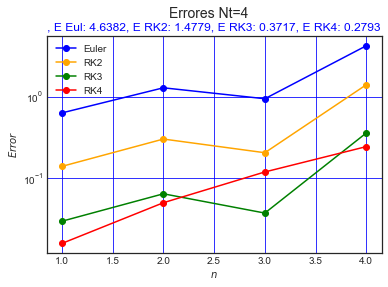

In [27]:
#gráfico de errores
Error = ', E Eul: {:4.4f}, E RK2: {:4.4f}, E RK3: {:4.4f}, E RK4: {:4.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
plt.title(Error, fontsize =12, color ='blue')
plt.style.use('seaborn-white')
plt.suptitle('Errores Nt=4', fontsize =14)
nticks = np.arange(1, Nt +1 ,1)
plt.plot(nticks, e_eul [1:],'b',  marker='o' , label ='Euler')
plt.plot(nticks, e_rk2 [1:],'orange',  marker='o', label ='RK2')
plt.plot(nticks, e_rk3 [1:],'g',  marker='o', label ='RK3')
plt.plot(nticks, e_rk4 [1:],'r',  marker='o', label ='RK4')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$Error$')
plt.legend()
plt.grid(color ='b')
plt.show()

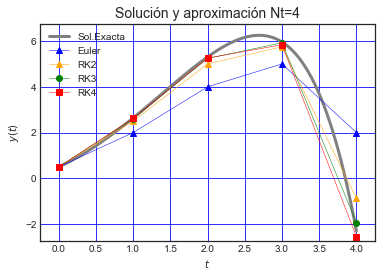

In [12]:
plt.style.use('seaborn-white')
plt.title('Solución y aproximación Nt=4', fontsize =14)
#plt.title(Prueba, fontsize =12, color ='blue')
plt.plot(tl, yp,'gray',lw =3,label ='Sol.Exacta')

plt.plot(t, y_eul,  marker='^', linestyle='-', color='b',lw =0.5,label ='Euler')
plt.plot(t, y_rk2,  marker='^', linestyle='-', color='orange',lw =0.5,label ='RK2')
plt.plot(t, y_rk3,  marker='o', linestyle='-', color='g',lw =0.5,label ='RK3')
plt.plot(t, y_rk4, marker='s', linestyle='-', color='r',lw =0.5,label ='RK4')
plt.xlim(-0.25,4.25)
plt.ylim(-2.75 ,6.75)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(), #ncol =1, framealpha =0.75 , fancybox =True , fontsize =14 )
plt.grid(color ='b')
nticks = np.arange(1, Nt +1 ,1)
#plt.plot(nticks, w_o[:-1],'C7v-', label ='$A^n$')
#plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

## Nt=8

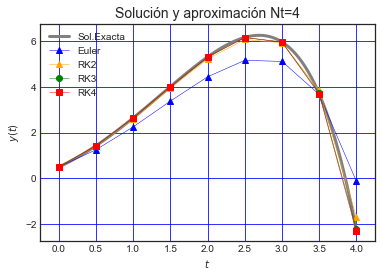

In [28]:
Nt = 8 #numero de pasos en el timempo
a = 0 #punto de inicio del domínio
b = 4 #punto final del dominio
Tmax = 4 #tiempo máximo
ht = mesh (a, b, Nt) #tamaño del paso del tiempo
y0 = 0.5 #condición inicial

t = np. linspace (a, b, Nt+1) #coordenadas de la malla
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_eul = np. zeros (Nt +1); #vector euler
y_rk2 = np. zeros (Nt +1) #vector rk2
y_rk3 = np. zeros (Nt +1) #vector rk3
y_rk4 = np. zeros (Nt +1) #vector rk4

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

ya = Euler (f, t, y_eul , ht)
yb = RK2 (f, t, y_rk2 , ht)
yc = RK3 (f, t, y_rk3 , ht)
yd = RK4 (f, t, y_rk4 , ht)
yp = Exacta (tl)
yp_2 = Exacta (t)
e_eul = np. abs (yp_2 - y_eul ) #cálculo de error para Euler hacia adelante
e_rk2 = np. abs (yp_2 - y_rk2 ) #cálculo de error para RK2
e_rk3 = np. abs (yp_2 - y_rk3 ) #cálculo de error para RK3
e_rk4 = np. abs (yp_2 - y_rk4 ) #cálculo de error para RK4
n_error_eul = np. linalg . norm (e_eul , 2) #aplicación de norma 2 al error
n_error_rk2 = np. linalg . norm (e_rk2 , 2) #aplicación de norma 2 al error
n_error_rk3 = np. linalg . norm (e_rk3 , 2) #aplicación de norma 2 al error
n_error_rk4 = np. linalg . norm (e_rk4 , 2) #aplicación de norma 2 al error
plt.style.use('seaborn-white')
plt.title('Solución y aproximación Nt=4', fontsize =14)
#plt.title(Prueba, fontsize =12, color ='blue')
plt.plot(tl, yp,'gray',lw =3,label ='Sol.Exacta')

plt.plot(t, y_eul,  marker='^', linestyle='-', color='b',lw =0.5,label ='Euler')
plt.plot(t, y_rk2,  marker='^', linestyle='-', color='orange',lw =0.5,label ='RK2')
plt.plot(t, y_rk3,  marker='o', linestyle='-', color='g',lw =0.5,label ='RK3')
plt.plot(t, y_rk4, marker='s', linestyle='-', color='r',lw =0.5,label ='RK4')
plt.xlim(-0.25,4.25)
plt.ylim(-2.75 ,6.75)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(), #ncol =1, framealpha =0.75 , fancybox =True , fontsize =14 )
plt.grid(color ='b')
nticks = np.arange(1, Nt +1 ,1)
#plt.plot(nticks, w_o[:-1],'C7v-', label ='$A^n$')
#plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

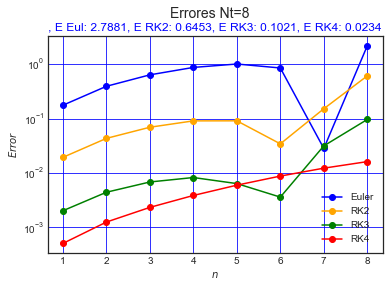

In [30]:
#gráfico de errores
Error = ', E Eul: {:4.4f}, E RK2: {:4.4f}, E RK3: {:4.4f}, E RK4: {:4.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
plt.title(Error, fontsize =12, color ='blue')
plt.style.use('seaborn-white')
plt.suptitle('Errores Nt=8', fontsize =14)
nticks = np.arange(1, Nt +1 ,1)
plt.plot(nticks, e_eul [1:],'b',  marker='o' , label ='Euler')
plt.plot(nticks, e_rk2 [1:],'orange',  marker='o', label ='RK2')
plt.plot(nticks, e_rk3 [1:],'g',  marker='o', label ='RK3')
plt.plot(nticks, e_rk4 [1:],'r',  marker='o', label ='RK4')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$Error$')
plt.legend()
plt.grid(color ='b')
plt.show()

## Nt = 16

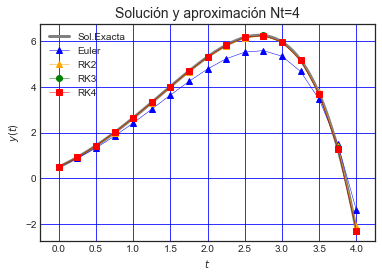

In [35]:
Nt = 16 #numero de pasos en el timempo
a = 0 #punto de inicio del domínio
b = 4 #punto final del dominio
Tmax = 4 #tiempo máximo
ht = mesh (a, b, Nt) #tamaño del paso del tiempo
y0 = 0.5 #condición inicial

t = np. linspace (a, b, Nt+1) #coordenadas de la malla
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_eul = np. zeros (Nt +1); #vector euler
y_rk2 = np. zeros (Nt +1) #vector rk2
y_rk3 = np. zeros (Nt +1) #vector rk3
y_rk4 = np. zeros (Nt +1) #vector rk4

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

ya = Euler (f, t, y_eul , ht)
yb = RK2 (f, t, y_rk2 , ht)
yc = RK3 (f, t, y_rk3 , ht)
yd = RK4 (f, t, y_rk4 , ht)
yp = Exacta (tl)
yp_2 = Exacta (t)
e_eul = np. abs (yp_2 - y_eul ) #cálculo de error para Euler hacia adelante
e_rk2 = np. abs (yp_2 - y_rk2 ) #cálculo de error para RK2
e_rk3 = np. abs (yp_2 - y_rk3 ) #cálculo de error para RK3
e_rk4 = np. abs (yp_2 - y_rk4 ) #cálculo de error para RK4
n_error_eul = np. linalg . norm (e_eul , 2) #aplicación de norma 2 al error
n_error_rk2 = np. linalg . norm (e_rk2 , 2) #aplicación de norma 2 al error
n_error_rk3 = np. linalg . norm (e_rk3 , 2) #aplicación de norma 2 al error
n_error_rk4 = np. linalg . norm (e_rk4 , 2) #aplicación de norma 2 al error
plt.style.use('seaborn-white')
plt.title('Solución y aproximación Nt=4', fontsize =14)
#plt.title(Prueba, fontsize =12, color ='blue')
plt.plot(tl, yp,'gray',lw =3,label ='Sol.Exacta')

plt.plot(t, y_eul,  marker='^', linestyle='-', color='b',lw =0.5,label ='Euler')
plt.plot(t, y_rk2,  marker='^', linestyle='-', color='orange',lw =0.5,label ='RK2')
plt.plot(t, y_rk3,  marker='o', linestyle='-', color='g',lw =0.5,label ='RK3')
plt.plot(t, y_rk4, marker='s', linestyle='-', color='r',lw =0.5,label ='RK4')
plt.xlim(-0.25,4.25)
plt.ylim(-2.75 ,6.75)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(), #ncol =1, framealpha =0.75 , fancybox =True , fontsize =14 )
plt.grid(color ='b')
nticks = np.arange(1, Nt +1 ,1)
#plt.plot(nticks, w_o[:-1],'C7v-', label ='$A^n$')
#plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

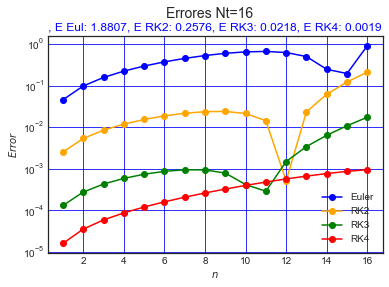

In [36]:
#gráfico de errores
Error = ', E Eul: {:4.4f}, E RK2: {:4.4f}, E RK3: {:4.4f}, E RK4: {:4.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
plt.title(Error, fontsize =12, color ='blue')
plt.style.use('seaborn-white')
plt.suptitle('Errores Nt=16', fontsize =14)
nticks = np.arange(1, Nt +1 ,1)
plt.plot(nticks, e_eul [1:],'b',  marker='o' , label ='Euler')
plt.plot(nticks, e_rk2 [1:],'orange',  marker='o', label ='RK2')
plt.plot(nticks, e_rk3 [1:],'g',  marker='o', label ='RK3')
plt.plot(nticks, e_rk4 [1:],'r',  marker='o', label ='RK4')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$Error$')
plt.legend()
plt.grid(color ='b')
plt.show()

## Nt=32

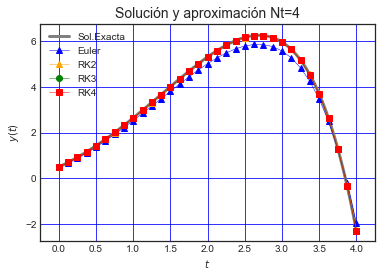

In [32]:
Nt = 32 #numero de pasos en el timempo
a = 0 #punto de inicio del domínio
b = 4 #punto final del dominio
Tmax = 4 #tiempo máximo
ht = mesh (a, b, Nt) #tamaño del paso del tiempo
y0 = 0.5 #condición inicial

t = np. linspace (a, b, Nt+1) #coordenadas de la malla
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_eul = np. zeros (Nt +1); #vector euler
y_rk2 = np. zeros (Nt +1) #vector rk2
y_rk3 = np. zeros (Nt +1) #vector rk3
y_rk4 = np. zeros (Nt +1) #vector rk4

y_eul [0]= y0
y_rk2 [0]= y0
y_rk3 [0]= y0
y_rk4 [0]= y0

ya = Euler (f, t, y_eul , ht)
yb = RK2 (f, t, y_rk2 , ht)
yc = RK3 (f, t, y_rk3 , ht)
yd = RK4 (f, t, y_rk4 , ht)
yp = Exacta (tl)
yp_2 = Exacta (t)
e_eul = np. abs (yp_2 - y_eul ) #cálculo de error para Euler hacia adelante
e_rk2 = np. abs (yp_2 - y_rk2 ) #cálculo de error para RK2
e_rk3 = np. abs (yp_2 - y_rk3 ) #cálculo de error para RK3
e_rk4 = np. abs (yp_2 - y_rk4 ) #cálculo de error para RK4
n_error_eul = np. linalg . norm (e_eul , 2) #aplicación de norma 2 al error
n_error_rk2 = np. linalg . norm (e_rk2 , 2) #aplicación de norma 2 al error
n_error_rk3 = np. linalg . norm (e_rk3 , 2) #aplicación de norma 2 al error
n_error_rk4 = np. linalg . norm (e_rk4 , 2) #aplicación de norma 2 al error
plt.style.use('seaborn-white')
plt.title('Solución y aproximación Nt=4', fontsize =14)
#plt.title(Prueba, fontsize =12, color ='blue')
plt.plot(tl, yp,'gray',lw =3,label ='Sol.Exacta')

plt.plot(t, y_eul,  marker='^', linestyle='-', color='b',lw =0.5,label ='Euler')
plt.plot(t, y_rk2,  marker='^', linestyle='-', color='orange',lw =0.5,label ='RK2')
plt.plot(t, y_rk3,  marker='o', linestyle='-', color='g',lw =0.5,label ='RK3')
plt.plot(t, y_rk4, marker='s', linestyle='-', color='r',lw =0.5,label ='RK4')
plt.xlim(-0.25,4.25)
plt.ylim(-2.75 ,6.75)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(), #ncol =1, framealpha =0.75 , fancybox =True , fontsize =14 )
plt.grid(color ='b')
nticks = np.arange(1, Nt +1 ,1)
#plt.plot(nticks, w_o[:-1],'C7v-', label ='$A^n$')
#plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()

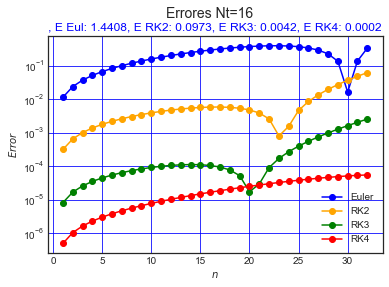

In [33]:
#gráfico de errores
Error = ', E Eul: {:4.4f}, E RK2: {:4.4f}, E RK3: {:4.4f}, E RK4: {:4.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
plt.title(Error, fontsize =12, color ='blue')
plt.style.use('seaborn-white')
plt.suptitle('Errores Nt=16', fontsize =14)
nticks = np.arange(1, Nt +1 ,1)
plt.plot(nticks, e_eul [1:],'b',  marker='o' , label ='Euler')
plt.plot(nticks, e_rk2 [1:],'orange',  marker='o', label ='RK2')
plt.plot(nticks, e_rk3 [1:],'g',  marker='o', label ='RK3')
plt.plot(nticks, e_rk4 [1:],'r',  marker='o', label ='RK4')
plt.yscale('log')
plt.xlabel('$n$')
plt.ylabel('$Error$')
plt.legend()
plt.grid(color ='b')
plt.show()